<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan

In [1]:
# Setup lingkungan
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# TensorBoard
try:
    %load_ext tensorboard
except:
    pass

# Library umum
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

# Konfigurasi
np.random.seed(42)
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lokasi penyimpanan gambar
IMAGES_PATH = os.path.join(".", "images", "deep")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


#Vanishing/Exploding Gradients Problem dan Xavier and He Initialization

Saving figure sigmoid_saturation_plot


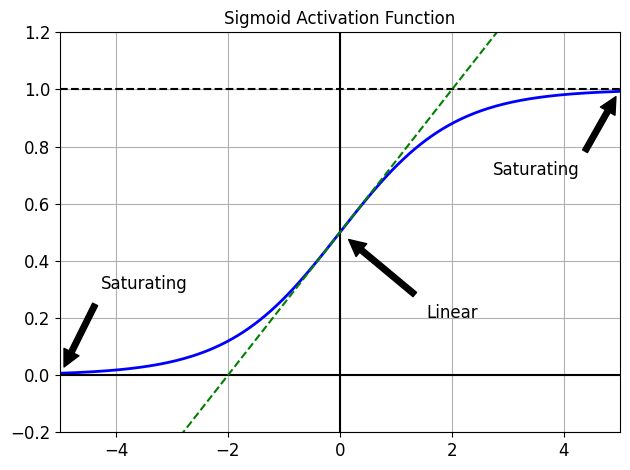

In [2]:
# Fungsi aktivasi sigmoid
def logit(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid
z = np.linspace(-5, 5, 200)
plt.plot(z, logit(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')

# Anotasi
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=12, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=12, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=12, ha="center")

plt.title("Sigmoid Activation Function")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
save_fig("sigmoid_saturation_plot")
plt.show()


In [3]:
# Lihat semua inisialisasi bawaan
[k for k in dir(keras.initializers) if not k.startswith("_")]

# Dense layer dengan inisialisasi He normal
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# Alternatif: Variance Scaling (setara dengan He atau Glorot tergantung parameternya)
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)


<Dense name=dense_1, built=False>

#Nonsaturating Activation Functions

##Leaky ReLU

Saving figure leaky_relu_plot


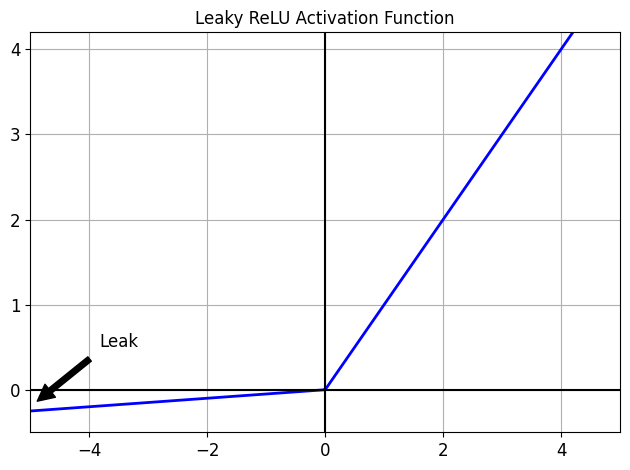

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [4]:
# Fungsi Leaky ReLU dan plotnya
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=12, ha="center")
plt.title("Leaky ReLU Activation Function")
plt.axis([-5, 5, -0.5, 4.2])
save_fig("leaky_relu_plot")
plt.show()

# Aktivasi dan Layer yang berkaitan dengan ReLU
[act for act in dir(keras.activations) if not act.startswith("_")]
[layer for layer in dir(keras.layers) if "relu" in layer.lower()]


In [5]:
# Load & preprocessing data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Set seed
tf.random.set_seed(42)
np.random.seed(42)

# Membangun model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

# Compile & fit
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5090 - loss: 1.5883 - val_accuracy: 0.7090 - val_loss: 0.8520
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7190 - loss: 0.8162 - val_accuracy: 0.7652 - val_loss: 0.7011
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7677 - loss: 0.6923 - val_accuracy: 0.7912 - val_loss: 0.6314
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7898 - loss: 0.6285 - val_accuracy: 0.8040 - val_loss: 0.5878
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8045 - loss: 0.5872 - val_accuracy: 0.8152 - val_loss: 0.5575
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8139 - loss: 0.5578 - val_accuracy: 0.8232 - val_loss: 0.5349
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8197 - loss: 0.5356 - val_accuracy: 0.8276 - val_loss: 0.5174
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8244 - loss: 0.5182 - 

=== Ringkasan Metrik ===
accuracy: 0.8329
val_accuracy: 0.8400
loss: 0.4940
val_loss: 0.4821


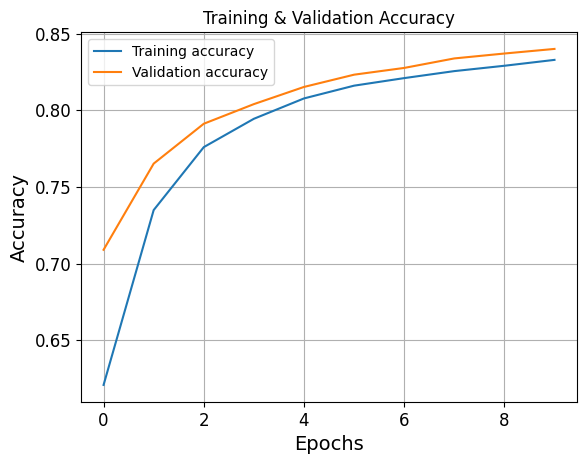

In [7]:
# Ekstrak hasil pelatihan
history_dict = history.history

print("=== Ringkasan Metrik ===")
for key in ['accuracy', 'val_accuracy', 'loss', 'val_loss']:
    print(f"{key}: {history_dict[key][-1]:.4f}")

# Plot Akurasi
plt.plot(history_dict['accuracy'], label='Training accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

##PReLU

In [8]:
# Set seed
tf.random.set_seed(42)
np.random.seed(42)

# Bangun model dengan PReLU
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

# Compile & fit model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5070 - loss: 1.6882 - val_accuracy: 0.7326 - val_loss: 0.9018
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7392 - loss: 0.8518 - val_accuracy: 0.7748 - val_loss: 0.7097
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7749 - loss: 0.6991 - val_accuracy: 0.7968 - val_loss: 0.6320
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7948 - loss: 0.6286 - val_accuracy: 0.8126 - val_loss: 0.5864
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8076 - loss: 0.5854 - val_accuracy: 0.8224 - val_loss: 0.5554
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8159 - loss: 0.5553 - val_accuracy: 0.8270 - val_loss: 0.5324
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8216 - loss: 0.5328 - val_accuracy: 0.8300 - val_loss: 0.5148
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8269 - loss: 0.5153 - 

=== Ringkasan Metrik Setelah 10 Epoch ===
accuracy: 0.8342
val_accuracy: 0.8432
loss: 0.4891
val_loss: 0.4790


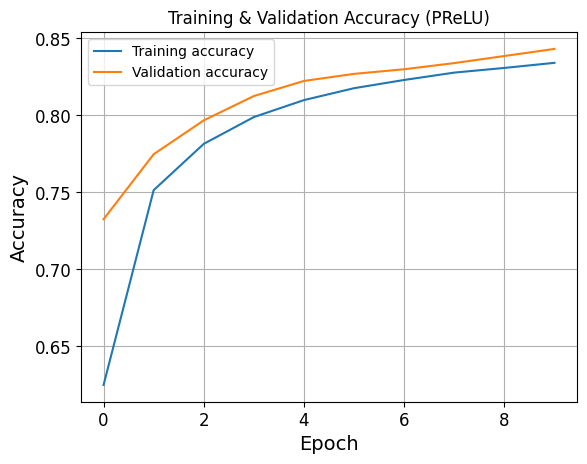

In [9]:
# Ambil riwayat pelatihan
hist = history.history

# Tampilkan metrik akhir
print("=== Ringkasan Metrik Setelah 10 Epoch ===")
for m in ['accuracy', 'val_accuracy', 'loss', 'val_loss']:
    print(f"{m}: {hist[m][-1]:.4f}")

# Plot akurasi
plt.plot(hist['accuracy'], label='Training accuracy')
plt.plot(hist['val_accuracy'], label='Validation accuracy')
plt.title("Training & Validation Accuracy (PReLU)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


##ELU

Saving figure elu_plot


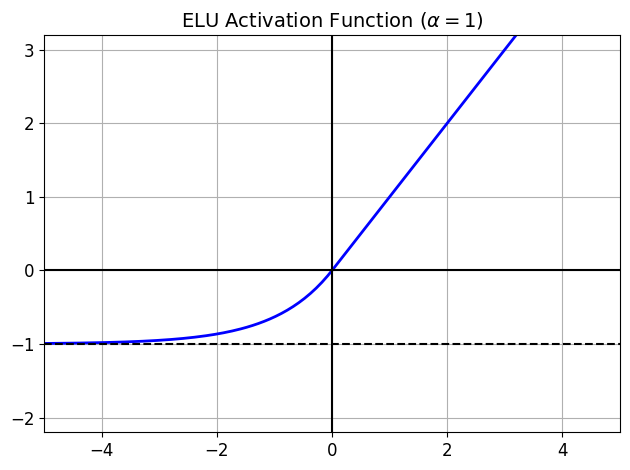

In [10]:
# Fungsi aktivasi ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

# Plot fungsi ELU
z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU Activation Function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
save_fig("elu_plot")
plt.show()

In [11]:
# Contoh layer Dense menggunakan ELU
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

##SELU

Saving figure selu_plot


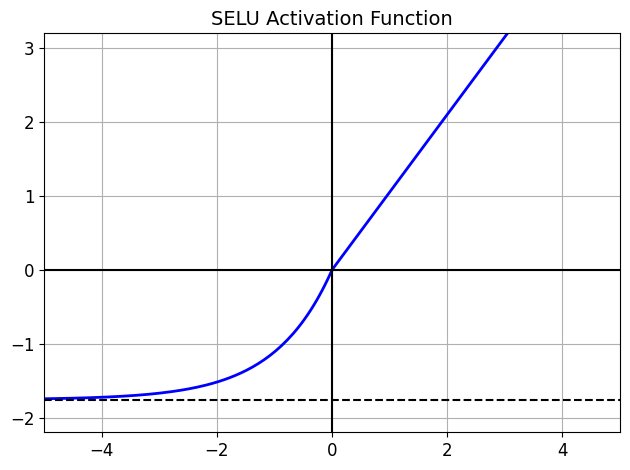

In [12]:
from scipy.special import erfc

# Hitung konstanta untuk self-normalizing
alpha_0_1 = -np.sqrt(2/np.pi) / (erfc(1/np.sqrt(2)) * np.exp(0.5) - 1)
scale_0_1 = (1 - erfc(1/np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * \
            (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e -
             2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-0.5)

# Definisi fungsi SELU
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

# Plot fungsi SELU
z = np.linspace(-5, 5, 200)
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU Activation Function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
save_fig("selu_plot")
plt.show()


In [13]:
# Standardisasi data
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds


In [14]:
np.random.seed(42)
tf.random.set_seed(42)

model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_selu.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for _ in range(99):
    model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_selu.add(keras.layers.Dense(10, activation="softmax"))

model_selu.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                   metrics=["accuracy"])

history_selu = model_selu.fit(X_train_scaled, y_train, epochs=5,
                              validation_data=(X_valid_scaled, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.4526 - loss: 1.4544 - val_accuracy: 0.6428 - val_loss: 0.9634
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.6986 - loss: 0.8372 - val_accuracy: 0.7546 - val_loss: 0.7075
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7616 - loss: 0.6636 - val_accuracy: 0.7716 - val_loss: 0.6363
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7933 - loss: 0.5886 - val_accuracy: 0.8044 - val_loss: 0.5850
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8140 - loss: 0.5358 - val_accuracy: 0.8116 - val_loss: 0.5526


In [15]:
np.random.seed(42)
tf.random.set_seed(42)

model_relu = keras.models.Sequential()
model_relu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_relu.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for _ in range(99):
    model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(10, activation="softmax"))

model_relu.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                   metrics=["accuracy"])

history_relu = model_relu.fit(X_train_scaled, y_train, epochs=5,
                              validation_data=(X_valid_scaled, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.1513 - loss: 2.2030 - val_accuracy: 0.1954 - val_loss: 2.5357
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.3376 - loss: 1.6679 - val_accuracy: 0.4614 - val_loss: 1.3636
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.5185 - loss: 1.1650 - val_accuracy: 0.6606 - val_loss: 0.8868
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6353 - loss: 0.8957 - val_accuracy: 0.6270 - val_loss: 0.9940
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6949 - loss: 0.7723 - val_accuracy: 0.6156 - val_loss: 0.9667



=== Metrik Akhir SELU ===
accuracy: 0.8155
val_accuracy: 0.8116
loss: 0.5291
val_loss: 0.5526


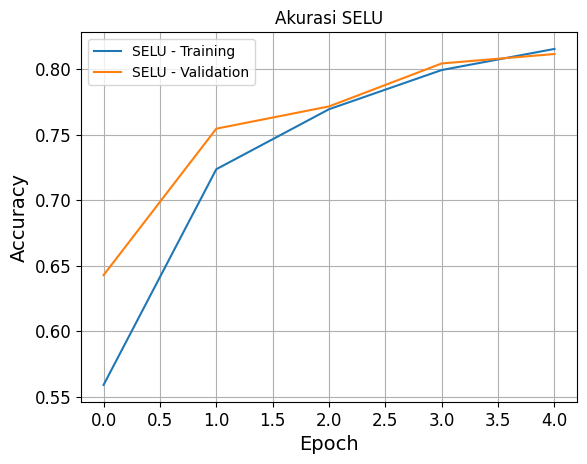


=== Metrik Akhir ReLU ===
accuracy: 0.7056
val_accuracy: 0.6156
loss: 0.7555
val_loss: 0.9667


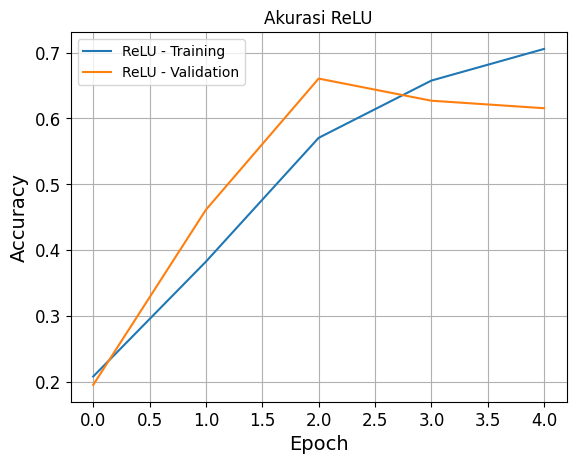

In [16]:
def show_metrics_plot(history, label="Model"):
    hist = history.history
    print(f"\n=== Metrik Akhir {label} ===")
    for m in ['accuracy', 'val_accuracy', 'loss', 'val_loss']:
        print(f"{m}: {hist[m][-1]:.4f}")

    plt.plot(hist['accuracy'], label=f'{label} - Training')
    plt.plot(hist['val_accuracy'], label=f'{label} - Validation')
    plt.title(f"Akurasi {label}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Tampilkan metrik dan plot
show_metrics_plot(history_selu, label="SELU")
show_metrics_plot(history_relu, label="ReLU")


#Batch Normalization

In [17]:
# Model 1: BatchNorm di antara Dense (bias aktif)
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model1.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=["accuracy"])

history1 = model1.fit(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6151 - loss: 1.1828 - val_accuracy: 0.8124 - val_loss: 0.5727
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7960 - loss: 0.6041 - val_accuracy: 0.8274 - val_loss: 0.4961
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8195 - loss: 0.5285 - val_accuracy: 0.8406 - val_loss: 0.4598
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8325 - loss: 0.4875 - val_accuracy: 0.8476 - val_loss: 0.4370
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8419 - loss: 0.4596 - val_accuracy: 0.8522 - val_loss: 0.4208
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8489 - loss: 0.4383 - val_accuracy: 0.8560 - val_loss: 0.4085
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8543 - loss: 0.4210 - val_accuracy: 0.8582 - val_loss: 0.3985
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.4063 -

In [18]:
# Model 2: BatchNorm dengan bias=False dan aktivasi dipisah
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5611 - loss: 1.4010 - val_accuracy: 0.7840 - val_loss: 0.6675
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7754 - loss: 0.7026 - val_accuracy: 0.8186 - val_loss: 0.5513
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8032 - loss: 0.5991 - val_accuracy: 0.8316 - val_loss: 0.4983
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8182 - loss: 0.5458 - val_accuracy: 0.8454 - val_loss: 0.4657
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8289 - loss: 0.5113 - val_accuracy: 0.8526 - val_loss: 0.4437
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8372 - loss: 0.4863 - val_accuracy: 0.8562 - val_loss: 0.4277
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8425 - loss: 0.4668 - val_accuracy: 0.8584 - val_loss: 0.4153
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8475 - loss: 0.4508 - 


=== Metrik Akhir Model 1 (BN + ReLU) ===
accuracy: 0.8681
val_accuracy: 0.8648
loss: 0.3773
val_loss: 0.3784


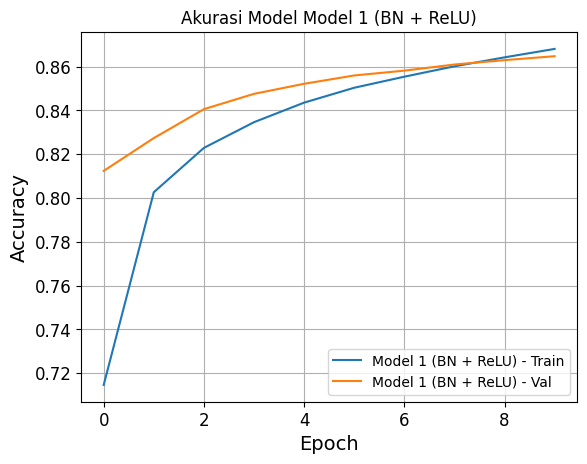


=== Metrik Akhir Model 2 (BN + No Bias + ReLU Separated) ===
accuracy: 0.8557
val_accuracy: 0.8664
loss: 0.4215
val_loss: 0.3900


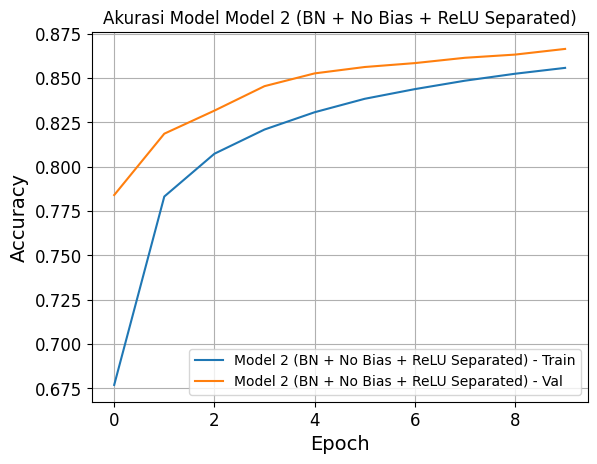

In [19]:
def show_metrics_plot(history, label):
    hist = history.history
    print(f"\n=== Metrik Akhir {label} ===")
    for key in ['accuracy', 'val_accuracy', 'loss', 'val_loss']:
        print(f"{key}: {hist[key][-1]:.4f}")
    plt.plot(hist['accuracy'], label=f'{label} - Train')
    plt.plot(hist['val_accuracy'], label=f'{label} - Val')
    plt.title(f"Akurasi Model {label}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

show_metrics_plot(history1, "Model 1 (BN + ReLU)")
show_metrics_plot(history2, "Model 2 (BN + No Bias + ReLU Separated)")


## 📘 Ringkasan Eksperimen: Batch Normalization dengan Fashion MNIST

###  Model 1: BatchNormalization + ReLU (bias aktif)
- `BatchNormalization` ditempatkan sebelum setiap layer `Dense`.
- Fungsi aktivasi `ReLU` digabung dalam `Dense layer`.
- Parameter `bias` tetap digunakan (`use_bias=True` secara default).
- Optimizer: `SGD`, Loss: `sparse_categorical_crossentropy`, Epoch: 10.

###  Model 2: BatchNormalization + ReLU dipisah (bias nonaktif)
- Setiap layer `Dense` menggunakan `use_bias=False` karena fungsi bias digantikan oleh `BatchNormalization`.
- Aktivasi `ReLU` diletakkan sebagai layer terpisah setelah `BatchNormalization`.
- Optimizer dan setup pelatihan sama seperti Model 1.

---

##  Hasil Pelatihan (Epoch ke-10)

| Metrik       | Model 1 (BN + ReLU) | Model 2 (BN + No Bias + ReLU Separated) |
|--------------|----------------------|------------------------------------------|
| Accuracy     | 86.81%               | 85.57%                                   |
| Val Accuracy | 86.48%               | 86.64%                                   |
| Loss         | 0.3773               | 0.4215                                   |
| Val Loss     | 0.3784               | 0.3900                                   |

---

##  Kesimpulan

- Kedua model menunjukkan performa **mirip**, dengan validasi akurasi di atas **86%**.
- **Model 1** memiliki sedikit keunggulan dalam akurasi training, namun
- **Model 2** menunjukkan **generalisasi yang lebih baik** pada data validasi.
- Menggunakan `BatchNormalization` dan memisahkan aktivasi dari `Dense` tetap efektif dan tidak merugikan performa.
- **Batch Normalization** tetap powerful baik digunakan **sebelum atau sesudah aktivasi**, tergantung preferensi arsitektur.

